In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from scipy.optimize import curve_fit
mat = io.loadmat('gain.mat')
gain_sameclus = mat['gain_sameclus']
gain_diffclus_crosspol = mat['gain_diffclus_crosspol']
gain_diffclus_samepol = mat['gain_diffclus_samepol']
azi_rot = mat['azi_rot']
ele_rot = mat['ele_rot']
realization = 1000
import seaborn as sns
from matplotlib import cm

Gain(Reali,Azimuth,Elevation)

In [2]:
angle_number=gain_sameclus.shape[1]
gain_sameclus_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_crosspol_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_samepol_mean =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_sameclus_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_crosspol_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)
gain_diffclus_samepol_var =  np.zeros((angle_number,int(angle_number/2)),dtype=float)

for i in range(angle_number):
    for j in range(int(angle_number/2)):
        gain_sameclus_mean[i,j] = np.mean(gain_sameclus[:,i,j])
        gain_sameclus_var[i,j] = np.var(gain_sameclus[:,i,j])
        
        gain_diffclus_crosspol_mean[i,j] = np.mean(gain_diffclus_crosspol[:,i,j])
        gain_diffclus_crosspol_var[i,j] = np.var(gain_diffclus_crosspol[:,i,j])
        
        gain_diffclus_samepol_mean[i,j] = np.mean(gain_diffclus_samepol[:,i,j])
        gain_diffclus_samepol_var[i,j] = np.var(gain_diffclus_samepol[:,i,j])

In [3]:
print(np.mean(gain_sameclus_mean))
print(np.max(gain_sameclus_mean))
print(np.mean(gain_diffclus_crosspol_mean))
print(np.max(gain_diffclus_crosspol_mean))
print(np.mean(gain_diffclus_samepol_mean))
print(np.max(gain_diffclus_samepol_mean))

10.30805811952661
14.585873116209838
6.608870602794444
18.49139605201828
7.148632390416313
18.52887390959102


In [4]:
# print(gain_sameclus_mean==gain_diffclus_samepol)
print(gain_sameclus_mean==gain_diffclus_crosspol_mean)
print(gain_diffclus_samepol_mean)
print(gain_diffclus_samepol_mean)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[18.52887391 18.22442113 17.31493266 ... 17.28285589 18.20747885
  18.52887391]
 [18.37945491 18.07758258 17.1754976  ... 17.14340976 18.06059502
  18.37945491]
 [17.94011381 17.64555768 16.76592975 ... 16.73334437 17.62850326
  17.94011381]
 ...
 [17.94011381 17.64555768 16.76592975 ... 16.73334437 17.62850326
  17.94011381]
 [18.37945491 18.07758258 17.1754976  ... 17.14340976 18.06059502
  18.37945491]
 [18.52887391 18.22442113 17.31493266 ... 17.28285589 18.20747885
  18.52887391]]
[[18.52887391 18.22442113 17.31493266 ... 17.28285589 18.20747885
  18.52887391]
 [18.37945491 18.07758258 17.1754976  ... 17.14340976 18.06059502
  18.37945491]
 [17.94011381 17.64555768 16.76592975 ... 16.73334437 17.62850326
  17.94011381]
 

In [5]:
print(gain_sameclus_var)
print('-----------')
print(gain_diffclus_crosspol_var)
print('-----------')
print(gain_diffclus_samepol_var)

[[ 86.23281005  86.22688257  95.00380665 ... 112.24488499  95.89537887
   86.23281005]
 [ 84.67085744  85.33900855  94.55505612 ... 109.03002263  93.52411395
   84.67085744]
 [ 80.23610283  82.80849067  93.28304463 ...  99.88329841  86.77203052
   80.23610283]
 ...
 [ 80.23610283  82.80849067  93.28304463 ...  99.88329841  86.77203052
   80.23610283]
 [ 84.67085744  85.33900855  94.55505612 ... 109.03002263  93.52411395
   84.67085744]
 [ 86.23281005  86.22688257  95.00380665 ... 112.24488499  95.89537887
   86.23281005]]
-----------
[[0.01451972 0.07581068 0.72220207 ... 0.73683039 0.07795269 0.01451972]
 [0.01427082 0.07449422 0.70982447 ... 0.72429585 0.07663736 0.01427082]
 [0.0135559  0.07071754 0.67437463 ... 0.68823082 0.07287971 0.0135559 ]
 ...
 [0.0135559  0.07071754 0.67437463 ... 0.68823082 0.07287971 0.0135559 ]
 [0.01427082 0.07449422 0.70982447 ... 0.72429585 0.07663736 0.01427082]
 [0.01451972 0.07581068 0.72220207 ... 0.73683039 0.07795269 0.01451972]]
-----------
[[13

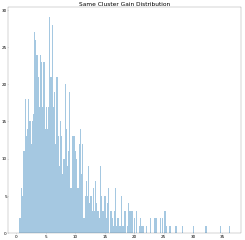

In [6]:
fig = plt.figure(figsize=(20,20), dpi=15)

plt.subplot(1, 1, 1)
plt.title('Same Cluster Gain Distribution', fontsize = 28)
sns.distplot(gain_diffclus_samepol[:,9,4],bins=180, kde = False)
# plt.xlim(0,100)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [7]:
print(azi_rot.shape)
print(ele_rot.shape)
print(azi_rot)
print(ele_rot)

(1, 50)
(1, 25)
[[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
  0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
  1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
  2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
  3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
  3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
  4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
  5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
  6.15495704 6.28318531]]
[[0.         0.13089969 0.26179939 0.39269908 0.52359878 0.65449847
  0.78539816 0.91629786 1.04719755 1.17809725 1.30899694 1.43989663
  1.57079633 1.70169602 1.83259571 1.96349541 2.0943951  2.2252948
  2.35619449 2.48709418 2.61799388 2.74889357 2.87979327 3.01069296
  3.14159265]]


In [8]:
print(gain_sameclus_mean)
print('-----------')
print(gain_diffclus_crosspol_mean)
print('-----------')
print(gain_diffclus_samepol_mean)

[[12.57169627 12.8069521  13.19183865 ... 12.8450931  12.59681983
  12.57169627]
 [12.47330011 12.73950556 13.14935267 ... 12.67876412 12.46245764
  12.47330011]
 [12.18509366 12.54254544 13.02550237 ... 12.19059936 12.0696866
  12.18509366]
 ...
 [12.18509366 12.54254544 13.02550237 ... 12.19059936 12.0696866
  12.18509366]
 [12.47330011 12.73950556 13.14935267 ... 12.67876412 12.46245764
  12.47330011]
 [12.57169627 12.8069521  13.19183865 ... 12.8450931  12.59681983
  12.57169627]]
-----------
[[0.18347205 0.47018231 1.37815646 ... 1.38165568 0.47247135 0.18347205]
 [0.1819648  0.46636997 1.36707316 ... 1.37068411 0.46866759 0.1819648 ]
 [0.17751856 0.45519102 1.33459764 ... 1.33848376 0.45751027 0.17751856]
 ...
 [0.17751856 0.45519102 1.33459764 ... 1.33848376 0.45751027 0.17751856]
 [0.1819648  0.46636997 1.36707316 ... 1.37068411 0.46866759 0.1819648 ]
 [0.18347205 0.47018231 1.37815646 ... 1.38165568 0.47247135 0.18347205]]
-----------
[[18.52887391 18.22442113 17.31493266 ... 

In [9]:
total_gain = np.zeros((3,angle_number,int(angle_number/2)))
total_gain[0,:,:]=gain_sameclus_mean
total_gain[1,:,:]=gain_diffclus_crosspol_mean
total_gain[2,:,:]=gain_diffclus_samepol_mean
index_gain_max = np.argmax(total_gain, axis=0)
# print(total_gain[index_gain_max])
gain_max=np.max(total_gain,axis=0)

In [10]:
print(index_gain_max)
print(gain_max)

[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[18.52887391 18.22442113 17.31493266 ... 17.28285589 18.20747885
  18.52887391]
 [18.37945491 18.07758258 17.1754976  ... 17.14340976 18.06059502
  18.37945491]
 [17.94011381 17.64555768 16.76592975 ... 16.73334437 17.62850326
  17.94011381]
 ...
 [17.94011381 17.64555768 16.76592975 ... 16.73334437 17.62850326
  17.94011381]
 [18.37945491 18.07758258 17.1754976  ... 17.14340976 18.06059502
  18.37945491]
 [18.52887391 18.22442113 17.31493266 ... 17.28285589 18.20747885
  18.52887391]]


In [11]:
aazi, eele = np.meshgrid(azi_rot, ele_rot, sparse=False, indexing='ij')
print(aazi)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.12822827 0.12822827 0.12822827 ... 0.12822827 0.12822827 0.12822827]
 [0.25645654 0.25645654 0.25645654 ... 0.25645654 0.25645654 0.25645654]
 ...
 [6.02672876 6.02672876 6.02672876 ... 6.02672876 6.02672876 6.02672876]
 [6.15495704 6.15495704 6.15495704 ... 6.15495704 6.15495704 6.15495704]
 [6.28318531 6.28318531 6.28318531 ... 6.28318531 6.28318531 6.28318531]]


In [12]:
test = np.unravel_index(gain_max.argmin(), gain_max.shape)
print(np.min(gain_max))
print(gain_diffclus_crosspol_mean[37,18])
print(gain_diffclus_samepol_mean[37,18])
print(gain_sameclus_mean[37,18])
print(np.mean(gain_diffclus_crosspol_mean))
print(np.mean(gain_diffclus_samepol_mean))
print(np.mean(gain_sameclus_mean))


3.9225606859369138
3.9191764460234273
3.9225606859369138
0.014317885493867557
6.608870602794444
7.148632390416313
10.30805811952661


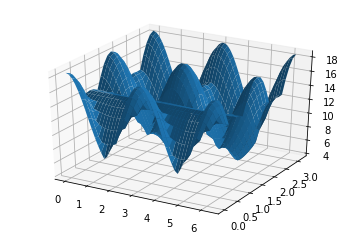

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# x = np.random.standard_normal(100)
# y = np.random.standard_normal(100)
# z = np.random.standard_normal(100)
# c = np.random.standard_normal(100)

ax.plot_surface(aazi, eele, gain_max)

plt.show()

In [14]:
print(np.min(gain_max))
print(np.min(gain_sameclus_mean))
print(np.min(gain_diffclus_crosspol_mean))
print(np.min(gain_diffclus_samepol_mean))
# print(np.mean(gain_sameclus_mean))
# print(np.mean(gain_diffclus_crosspol_mean))
# print(np.mean(gain_diffclus_samepol_mean))

3.9225606859369138
0.014317885493867557
0.07080451079948097
0.07075388663333039


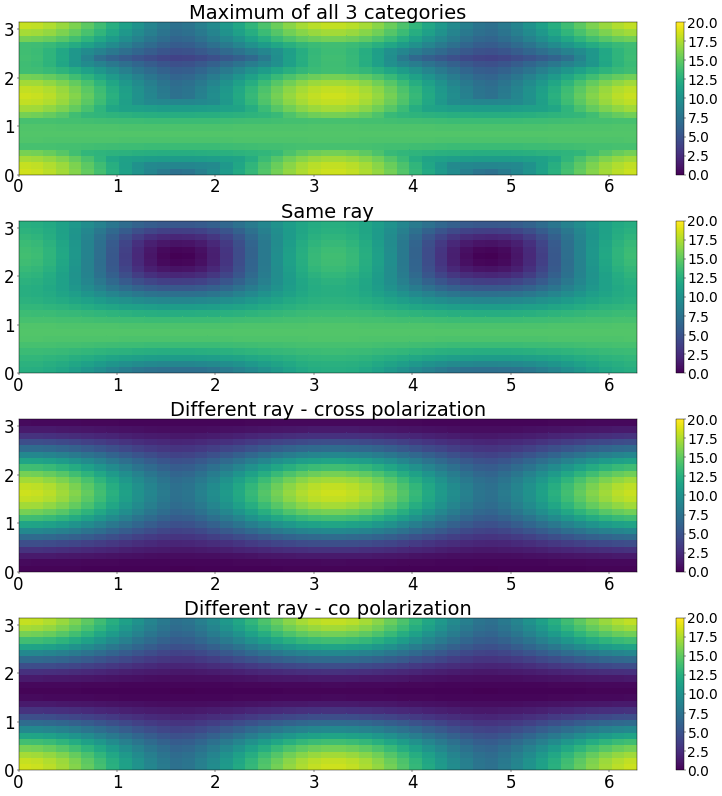

In [41]:
fig = plt.figure(figsize=(20,20), dpi=40)
plt.subplot(4, 1, 1)
plt.title('Maximum of all 3 categories', fontsize = 35)
plt.colorbar(plt.pcolor(aazi, eele, gain_max,vmin=0, vmax=20)).ax.tick_params(labelsize=25)
plt.tick_params(labelsize=30)

plt.subplot(4, 1, 2)
plt.title('Same ray', fontsize = 35)
plt.colorbar(plt.pcolor(aazi, eele, gain_sameclus_mean,vmin=0, vmax=20)).ax.tick_params(labelsize=25)
plt.tick_params(axis='both', which='major', labelsize=30)

plt.subplot(4, 1, 3)
plt.title('Different ray - cross polarization', fontsize = 35)
plt.colorbar(plt.pcolor(aazi, eele, gain_diffclus_crosspol_mean,vmin=0, vmax=20)).ax.tick_params(labelsize=25)
plt.tick_params(axis='both', which='major', labelsize=30)

plt.subplot(4, 1, 4)
plt.title('Different ray - co polarization', fontsize = 35)
plt.colorbar(plt.pcolor(aazi, eele, gain_diffclus_samepol_mean,vmin=0, vmax=20)).ax.tick_params(labelsize=25)

plt.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()

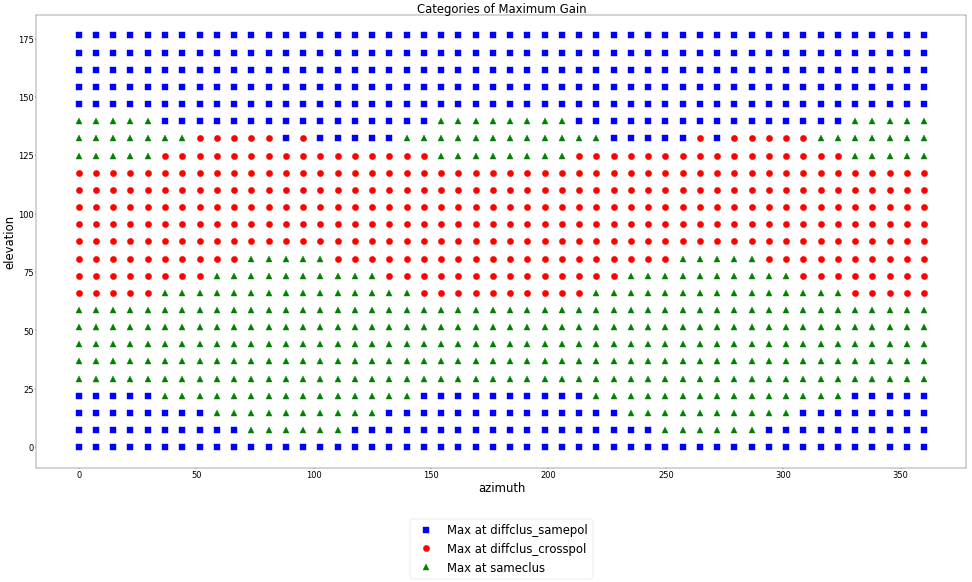

In [16]:
azi_diffclus_samepol,ele_diffclus_samepol = np.where( index_gain_max==2 )
azi_diffclus_crosspol,ele_diffclus_crosspol = np.where( index_gain_max==1 )
azi_sameclus,ele_sameclus = np.where( index_gain_max==0 )


fig = plt.figure(figsize=(40,20), dpi=30)
plt.plot(azi_diffclus_samepol*360/(angle_number-1),ele_diffclus_samepol*360/(angle_number-1),'bs', markersize = 15, label="Max at diffclus_samepol")
plt.plot(azi_diffclus_crosspol*360/(angle_number-1),ele_diffclus_crosspol*360/(angle_number-1),'ro', markersize = 15, label="Max at diffclus_crosspol")
plt.plot(azi_sameclus*360/(angle_number-1),ele_sameclus*360/(angle_number-1),'g^', markersize = 15, label="Max at sameclus")
plt.title('Categories of Maximum Gain', fontsize = 28)
plt.xlabel('azimuth',fontsize=28)
plt.ylabel('elevation',fontsize=28)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), prop={'size': 28})
plt.tick_params(axis='both', which='major', labelsize=20)

In [17]:
boundary_1 = np.zeros((2,angle_number))
boundary_2 = np.zeros((2,angle_number))
boundary_3 = np.zeros((2,angle_number))
boundary_4 = np.zeros((2,angle_number))

for i in range(angle_number):
    for j in range(int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_1[0,i] = i
            boundary_1[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_1[1,i]),int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_2[0,i] = i
            boundary_2[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_2[1,i]),int(angle_number/2)):
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_3[0,i] = i
            boundary_3[1,i] = (j+j+1)/2
            break
            
for i in range(angle_number):
    for j in range(ceil(boundary_3[1,i]),int(angle_number/2)):
        if j+1 == int(angle_number)/2:
            break
        if (index_gain_max[i,j+1]!=index_gain_max[i,j]):
            boundary_4[0,i] = i
            boundary_4[1,i] = (j+j+1)/2
            break

In [18]:
boundary_1 = boundary_1*2*np.pi/49
boundary_2 = boundary_2*2*np.pi/49
boundary_3 = boundary_3*2*np.pi/49

boundary_4_1 = boundary_4[:,:6]*2*np.pi/49
boundary_4_2 = boundary_4[:,19:31]*2*np.pi/49
boundary_4_3 = boundary_4[:,44:50]*2*np.pi/49

(0, 6.283185307179586)

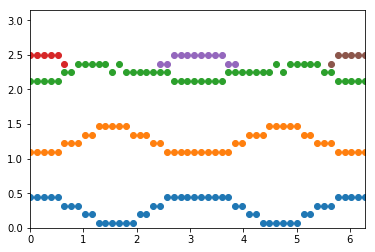

In [19]:
plt.scatter(boundary_1[0,:],boundary_1[1,:])

plt.scatter(boundary_2[0,:],boundary_2[1,:])

plt.scatter(boundary_3[0,:],boundary_3[1,:])

plt.scatter(boundary_4_1[0,:],boundary_4_1[1,:])
plt.scatter(boundary_4_2[0,:],boundary_4_2[1,:])
plt.scatter(boundary_4_3[0,:],boundary_4_3[1,:])

plt.ylim(0,np.pi)
plt.xlim(0,2*np.pi)


___Fitting Curve___

[1.69534802 0.28975427]
[-1.44624339  1.24385586]


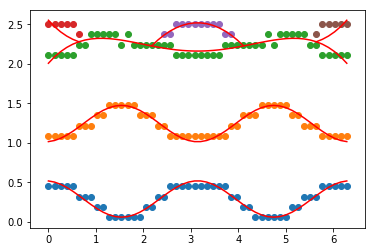

In [20]:
def func_sin(x, c, d):
    return np.sin(2*np.pi*x*0.312 + c)*0.23 + d


popt_boun1, pcov_boun1 = curve_fit(func_sin, boundary_1[0,:], boundary_1[1,:])
print(popt_boun1)
fit_bound1 = func_sin(boundary_1[0,:], *popt_boun1)
plt.scatter(boundary_1[0,:], boundary_1[1,:])
plt.plot(boundary_1[0,:], fit_bound1, 'r-', label='fit')


popt_boun2, pcov_boun2 = curve_fit(func_sin, boundary_2[0,:], boundary_2[1,:])
print(popt_boun2)
fit_bound2 = func_sin(boundary_2[0,:], *popt_boun2)
plt.scatter(boundary_2[0,:], boundary_2[1,:])
plt.plot(boundary_2[0,:], fit_bound2, 'r-', label='fit')


z = np.polyfit(boundary_3[0,:], boundary_3[1,:], 4)
p = np.poly1d(z)
plt.scatter(boundary_3[0,:],boundary_3[1,:])
plt.plot(boundary_3[0,:], p(boundary_3[0,:]), 'r-', label='fit')


p1 = -p + p[0]*2  + 2*(np.max(p(boundary_4_1[0,:]))-np.min(p(boundary_4_1[0,:])))
plt.scatter(boundary_4_1[0,:],boundary_4_1[1,:])
plt.plot(boundary_4_1[0,:], p1(boundary_4_1[0,:]), 'r-', label='fit')

# plt.plot(boundary_3[0,13:-13], p1(boundary_3[0,13:-13]), 'r-', label='fit')
# plt.scatter(boundary_4_2[0,:],boundary_4_2[1,:])
z2 = np.polyfit(boundary_4_2[0,:], boundary_4_2[1,:], 2)
p2 = np.poly1d(z2)
plt.scatter(boundary_4_2[0,:],boundary_4_2[1,:])
plt.plot(boundary_3[0,17:-17], p2(boundary_3[0,17:-17]), 'r-', label='fit')


plt.plot(boundary_4_3[0,:], p1(boundary_4_3[0,:]), 'r-', label='fit')
plt.scatter(boundary_4_3[0,:],boundary_4_3[1,:])

# plt.ylim(0,25)

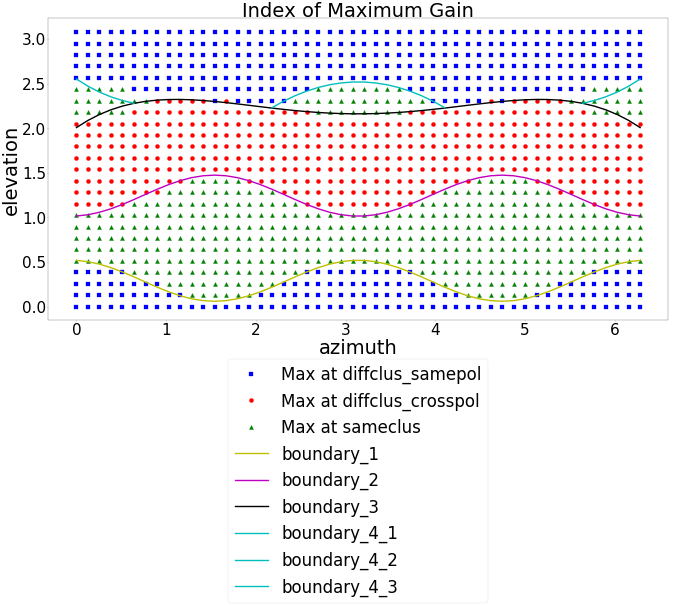

In [47]:
fig = plt.figure(figsize=(40,20), dpi=20)
plt.plot(azi_diffclus_samepol*2*np.pi/(angle_number-1),ele_diffclus_samepol*2*np.pi/(angle_number-1),'bs', markersize = 15, label="Max at diffclus_samepol")
plt.plot(azi_diffclus_crosspol*2*np.pi/(angle_number-1),ele_diffclus_crosspol*2*np.pi/(angle_number-1),'ro', markersize = 15, label="Max at diffclus_crosspol")
plt.plot(azi_sameclus*2*np.pi/(angle_number-1),ele_sameclus*2*np.pi/(angle_number-1),'g^', markersize = 15, label="Max at sameclus")

plt.plot(boundary_1[0,:], fit_bound1, 'y-',lw=5,label='boundary_1')
plt.plot(boundary_2[0,:], fit_bound2, 'm-',lw=5,label='boundary_2')
plt.plot(boundary_3[0,:], p(boundary_3[0,:]), 'k-',lw=5,label='boundary_3')
plt.plot(boundary_4_1[0,:], p1(boundary_4_1[0,:]), 'c-',lw=5,label='boundary_4_1')
plt.plot(boundary_3[0,17:-17], p2(boundary_3[0,17:-17]), 'c-',lw=5,label='boundary_4_2')

plt.plot(boundary_4_3[0,:], p1(boundary_4_3[0,:]), 'c-', lw=5,label='boundary_4_3')


plt.title('Index of Maximum Gain', fontsize = 70)
plt.xlabel('azimuth',fontsize=70)
plt.ylabel('elevation',fontsize=70)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), prop={'size': 60})
plt.tick_params(axis='both', which='major', labelsize=55)

In [22]:
bound1_para = np.copy(popt_boun1)
bound2_para = np.copy(popt_boun2)
bound3_para = np.copy(z)
bound4_1para = np.copy(p1.c)
bound4_2para = np.copy(z2)
bound4_3para = np.copy(p1.c)
xlim_4_1 = boundary_4_1[0,-1]
xlim_4_2 = np.zeros(2)
xlim_4_2[0] = boundary_3[0,17:-17][0]
xlim_4_2[1] = boundary_3[0,17:-17][-1]
xlim_4_3 = boundary_4_3[0,0]

In [23]:
var = {}
var['bound1_para']=bound1_para
var['bound2_para']=bound2_para
var['bound3_para']=bound3_para
var['bound4_1para']=bound4_1para
var['bound4_2para']=bound4_2para
var['bound4_3para']=bound4_3para
var['xlim_4_1']=xlim_4_1
var['xlim_4_2']=xlim_4_2
var['xlim_4_3']=xlim_4_3

io.savemat('boundary',var)

In [24]:
z

array([-0.00953346,  0.11980094, -0.48606615,  0.68926786,  2.00691021])